In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
fin_support_df = pd.read_csv('../data/interim/fin_support_data.csv')
fin_support_df.columns

Index([u'recipient_name', u'contribution_amount', u'year',
       u'candidate_or_measure', u'candidate_office_sought',
       u'support_or_oppose', u'contributor_name'],
      dtype='object')

In [3]:
fin_support_by_year = fin_support_df[['year', 'contribution_amount']].groupby(['year']).agg(sum)
fin_support_by_year.head()

,contribution_amount
year,
2007,1743967.94
2008,13021934.91
2009,975445.22
2010,6764910.10
2011,8136874.74


Text(0,0.5,u'Total Dollars Contributed')

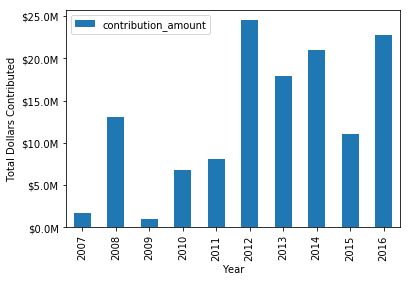

In [4]:
ax = fin_support_by_year.plot.bar()

# https://matplotlib.org/examples/pylab_examples/custom_ticker1.html
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

millions_formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(millions_formatter)
ax.set_xlabel('Year')
ax.set_ylabel('Total Dollars Contributed')

In [5]:
fin_support_just_support = fin_support_df[fin_support_df['support_or_oppose'] == 'Support']
fin_support_by_candidate = fin_support_just_support[['candidate_or_measure', 'contribution_amount']]
fin_support_by_candidate = fin_support_by_candidate.groupby(['candidate_or_measure']).agg(sum)
fin_support_by_candidate.head()

,contribution_amount
candidate_or_measure,
32: Prohibits Political Contributions by Payroll Deduction. Prohibitions on Contributions to Candidates. Initiative Statute. (Statewide),107013.29
41: Veterans Housing and Homeless Prevention Act (Statewide),500.00
A: Amends the City Charter to exempt from the managed competition process the core public safety services provided by participants in the City's safety retirement system,449598.70
A: Prohibits the City from requiring project labor agreements on City construction projects,1005679.04
A: Proposed San Diego County Charter amendment to ensure fair and open competition for county construction contracts.,381292.89


In [6]:
fin_support_top_ten = fin_support_by_candidate.sort_values(by='contribution_amount', ascending=False).iloc[:10]
fin_support_top_ten.head()

,contribution_amount
candidate_or_measure,
Kevin Faulconer,8323675.63
C: Downtown stadium initiative,8144128.68
David Alvarez,5911497.68
Bob Filner,5806292.01
Steve Francis,4696373.70


Text(0,0.5,u'Total Dollars Received')

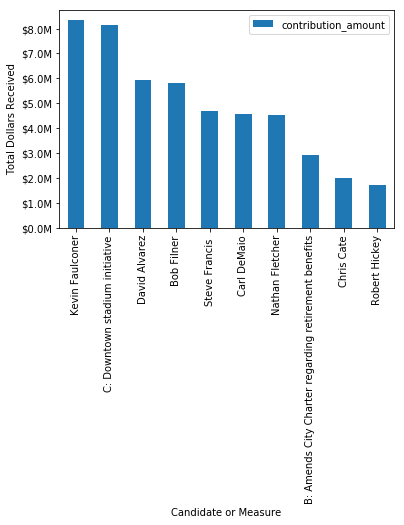

In [7]:
ax = fin_support_top_ten.plot.bar()

ax.yaxis.set_major_formatter(millions_formatter)
ax.set_xlabel('Candidate or Measure')
ax.set_ylabel('Total Dollars Received')

In [8]:
fin_support_top_ten = fin_support_top_ten.reset_index()
fin_support_top_ten

,candidate_or_measure,contribution_amount
0,Kevin Faulconer,8323675.63
1,C: Downtown stadium initiative,8144128.68
2,David Alvarez,5911497.68
3,Bob Filner,5806292.01
4,Steve Francis,4696373.70
5,Carl DeMaio,4555372.31
6,Nathan Fletcher,4526916.52
7,B: Amends City Charter regarding retirement be...,2926625.12
8,Chris Cate,1987663.16
9,Robert Hickey,1694005.88


In [11]:
fin_support_by_candidate_year = fin_support_just_support[['candidate_or_measure', 'contribution_amount', 'year']]
    .groupby(['candidate_or_measure', 'year']).agg(sum)
.reset_index()
fin_support_by_candidate_year = pd.merge(fin_support_top_ten, fin_support_by_candidate_year, on='candidate_or_measure', suffixes=('_total', '_year'))
fin_support_by_candidate_year = fin_support_by_candidate_year[['year', 'candidate_or_measure', 'contribution_amount_year']]
fin_support_by_candidate_year = fin_support_by_candidate_year.groupby(['year', 'candidate_or_measure']).agg(sum).unstack('year').fillna(0)

IndentationError: unexpected indent (<ipython-input-11-fe864abe1698>, line 2)

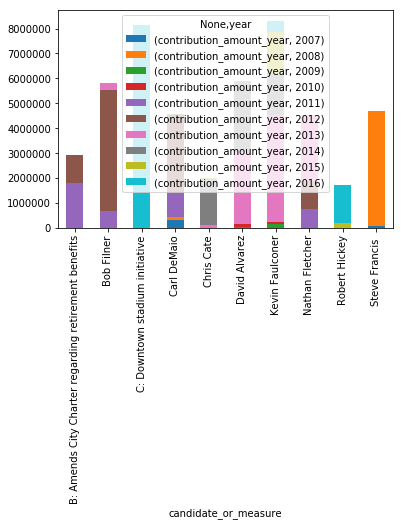

In [10]:
fin_support_by_candidate_year.plot.bar(stacked=True)